## IN3050/IN4050 Mandatory Assignment 2, 2024: Supervised Learning

## vetlehol 03/2024

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, March 22, 2024, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a regular Python script if you prefer.

#### Alternative 1
If you prefer not to use notebooks, you should deliver the code, your run results, and a PDF report where you answer all the questions and explain your work.

#### Alternative 2
If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs. (If you can't export: notebook -> latex -> pdf on your own machine, you may do this on the IFI linux machines.)

Here is a list of *absolutely necessary* (but not sufficient) conditions to get the assignment marked as passed:

- You must deliver your code (Python script or Jupyter notebook) you used to solve the assignment.
- The code used for making the output and plots must be included in the assignment. 
- You must include example runs that clearly shows how to run all implemented functions and methods.
- All the code (in notebook cells or python main-blocks) must run. If you have unfinished code that crashes, please comment it out and document what you think causes it to crash. 
- You must also deliver a pdf of the code, outputs, comments and plots as explained above.

Your report/notebook should contain your name and username.

Deliver one single compressed folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

### Goals of the assignment
The goal of this assignment is to get a better understanding of supervised learning with gradient descent. It will, in particular, consider the similarities and differences between linear classifiers and multi-layer feed forward neural networks (multi-layer perceptrons, MLP) and the differences and similarities between binary and multi-class classification. A significant part is dedicated to implementing and understanding the backpropagation algorithm. 

### Tools
The aim of the exercises is to give you a look inside the learning algorithms. You may freely use code from the weekly exercises and the published solutions. You should not use machine learning libraries like Scikit-Learn or PyTorch, because the point of this assignment is for you to implement things from scratch. You, however, are encouraged to use tools like NumPy and Pandas, which are not ML-specific.

The given precode uses NumPy. You are recommended to use NumPy since it results in more compact code, but feel free to use pure Python if you prefer. 

### Beware
This is a revised assignment compared to earlier years. If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your own and explain them!

### Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn # This is only to generate a dataset

## Datasets

We start by making a synthetic dataset of 2000 instances and five classes, with 400 instances in each class. (See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html regarding how the data are generated.) We choose to use a synthetic dataset---and not a set of natural occuring data---because we are mostly interested in properties of the various learning algorithms, in particular the differences between linear classifiers and multi-layer neural networks together with the difference between binary and multi-class data. In addition, we would like a dataset with instances represented with only two numerical features, so that it is easy to visualize the data. It would be rather difficult (although not impossible) to find a real-world dataset of the same nature. Anyway, you surely can use the code in this assignment for training machine learning models on real-world datasets.

When we are doing experiments in supervised learning, and the data are not already split into training and test sets, we should start by splitting the data. Sometimes there are natural ways to split the data, say training on data from one year and testing on data from a later year, but if that is not the case, we should shuffle the data randomly before splitting. (OK, that is not necessary with this particular synthetic data set, since it is already shuffled by default by Scikit-Learn, but that will not be the case with real-world data) We should split the data so that we keep the alignment between X (features) and t (class labels), which may be achieved by shuffling the indices. We split into 50% for training, 25% for validation, and 25% for final testing. The set for final testing *must not be used* till the end of the assignment in part 3.

We fix the seed both for data set generation and for shuffling, so that we work on the same datasets when we rerun the experiments. This is done by the `random_state` argument and the `rng = np.random.RandomState(2024)`.

In [2]:
# Generating the dataset
from sklearn.datasets import make_blobs
X, t_multi = make_blobs(n_samples=[400, 400, 400, 400, 400], centers=[[0,1],[4,2],[8,1],[2,0],[6,0]], 
                  n_features=2, random_state=2024, cluster_std=[1.0, 2.0, 1.0, 0.5, 0.5])

In [3]:
# Shuffling the dataset
indices = np.arange(X.shape[0])
rng = np.random.RandomState(2024)
rng.shuffle(indices)
indices[:10]

array([ 937, 1776,  868, 1282, 1396,  147,  601, 1193, 1789,  547])

In [4]:
# Splitting into train, dev and test
X_train = X[indices[:1000],:]
X_val = X[indices[1000:1500],:]
X_test = X[indices[1500:],:]
t_multi_train = t_multi[indices[:1000]]
t_multi_val = t_multi[indices[1000:1500]]
t_multi_test = t_multi[indices[1500:]]

Next, we will  make a second dataset with only two classes by merging the existing labels in (X,t), so that `0`, `1` and `2` become the new `0` and `3` and `4` become the new `1`. Let's call the new set (X, t2). This will be a binary set.
We now have two datasets:

- Binary set: `(X, t2)`
- Multi-class set: `(X, t_multi)`

In [5]:
t2_train = t_multi_train >= 3
t2_train = t2_train.astype('int')
t2_val = (t_multi_val >= 3).astype('int')
t2_test = (t_multi_test >= 3).astype('int')

We can plot the two traning sets.

Text(0.5, 1.0, 'Multi-class set')

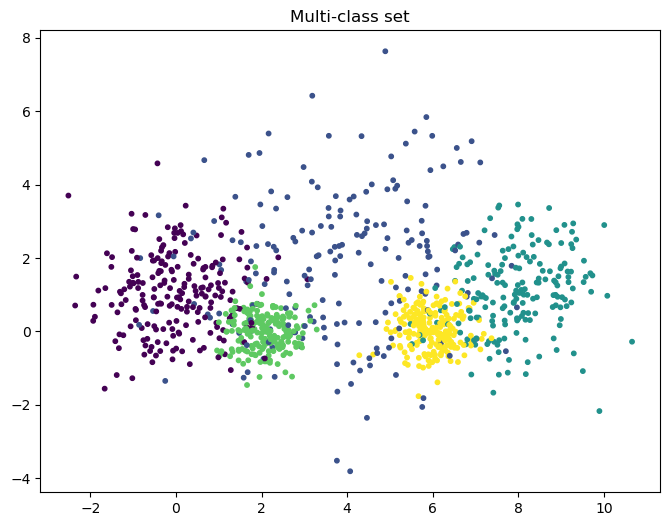

In [6]:
plt.figure(figsize=(8,6)) # You may adjust the size
plt.scatter(X_train[:, 0], X_train[:, 1], c=t_multi_train, s=10.0)
plt.title("Multi-class set")

Text(0.5, 1.0, 'Binary set')

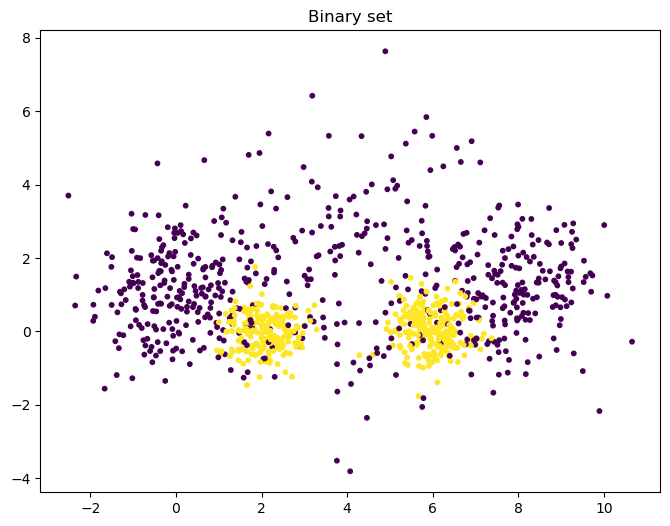

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=t2_train, s=10.0)
plt.title("Binary set")

# Part 1: Linear classifiers
### Linear regression

We see that even the binary set (X, t2) is far from linearly separable, and we will explore how various classifiers are able to handle this. We start with linear regression with the Mean Squared Error (MSE) loss, although it is not the most widely used approach for classification tasks: but we are interested. You may make your own implementation from scratch or start with the solution to the weekly exercise set 7. 
We include it here with a little added flexibility.

In [8]:
def add_bias(X, bias):
    """X is a NxM matrix: N datapoints, M features
    bias is a bias term, -1 or 1, or any other scalar. Use 0 for no bias
    Return a Nx(M+1) matrix with added bias in position zero
    """
    N = X.shape[0]
    biases = np.ones((N, 1)) * bias # Make a N*1 matrix of biases
    # Concatenate the column of biases in front of the columns of X.
    return np.concatenate((biases, X), axis  = 1) 

In [9]:
class NumpyClassifier():
    """Common methods to all Numpy classifiers --- if any"""

In [10]:
class NumpyLinRegClass(NumpyClassifier):

    def __init__(self, bias=-1):
        self.bias=bias
    
    def fit(self, X_train, t_train, lr = 0.1, epochs=10):
        """X_train is a NxM matrix, N data points, M features
        t_train is a vector of length N,
        the target class values for the training data
        lr is our learning rate
        """
        
        if self.bias:
            X_train = add_bias(X_train, self.bias)
            
        (N, M) = X_train.shape
        
        self.weights = weights = np.zeros(M)
        
        for epoch in range(epochs):
             #print("Epoch", epoch)
            weights -= lr / N *  X_train.T @ (X_train @ weights - t_train)      
    
    def predict(self, X, threshold=0.5):
        """X is a KxM matrix for some K>=1
        predict the value for each point in X"""
        if self.bias:
            X = add_bias(X, self.bias)
        ys = X @ self.weights
        return ys > threshold

We can train and test a first classifier.

In [11]:
def accuracy(predicted, gold):
    return np.mean(predicted == gold)

In [12]:
cl = NumpyLinRegClass()
cl.fit(X_train, t2_train, epochs=3)
print("Accuracy on the validation set:", accuracy(cl.predict(X_val), t2_val))

Accuracy on the validation set: 0.58


The following is a small procedure which plots the data set together with the decision boundaries. 
You may modify the colors and the rest of the graphics as you like.
The procedure will also work for multi-class classifiers

In [13]:
def plot_decision_regions(X, t, clf=[], size=(8,6)):
    """Plot the data set (X,t) together with the decision boundary of the classifier clf"""
    # The region of the plane to consider determined by X
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Make a prediction of the whole region
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Classify each meshpoint.
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=size) # You may adjust this

    # Put the result into a color plot
    plt.contourf(xx, yy, Z, alpha=0.2, cmap = 'Paired')

    plt.scatter(X[:,0], X[:,1], c=t, s=10.0, cmap='Paired')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision regions")
    plt.xlabel("x0")
    plt.ylabel("x1")

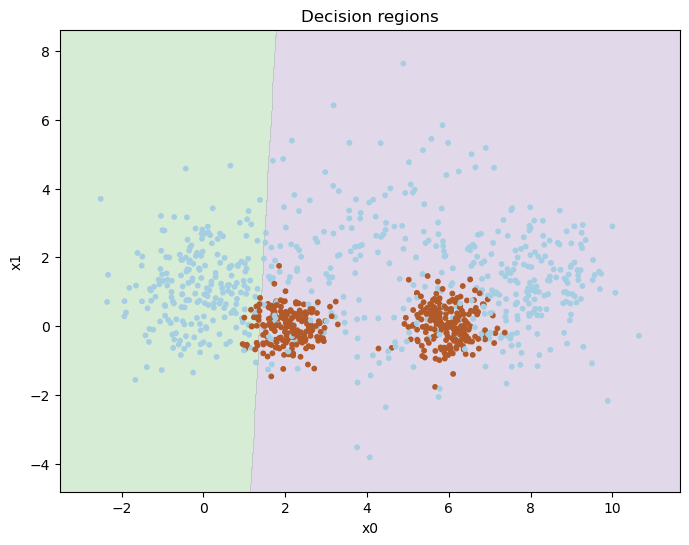

In [14]:
plot_decision_regions(X_train, t2_train, cl)

### Task: Tuning

The result is far from impressive. 
Remember that a classifier which always chooses the majority class will have an accuracy of 0.6 on this data set.

Your task is to try various settings for the two training hyper-parameters, learning rate and the number of epochs, to get the best accuracy on the validation set. 

Report how the accuracy varies with the hyper-parameter settings. It it not sufficient to give the final hyperparameters. You must also show how you found then and results for alternative values you tried aout.

When you are satisfied with the result, you may plot the decision boundaries, as above.

### Tuning Answer

- I will be trying with bruteforcing, by testing many combinations of epochs and learning rate. And hopefully finding a good accuracy for this training set.
- It seems that for this training set, low epochs are better, and only a learning rate of 0.1 was good. This data is hard to train on, the desicion regions are janky at best, atleast for now, maybe with scaling it becomes better.

In [15]:
"""Function is slow, but i atleast ensure that i find good parameters"""

def find_optimal_hyperparameters(cl_tuning, X_train, t2_train, epochs_range = 101):
    """For each learning rate, test different epoch values, 
       and ultimately find the optimal lr and epoch for the training set
       Takes in range of epochs to test, and a classifier"""
    
    best = [None,None,0] #[lr, epoch, accuracy]
    learning_rates = np.linspace(0.1,1,99, dtype=float)
    epochs = np.linspace(1,epochs_range,100, dtype=int)
    
    for l_r in learning_rates:
        for epoch in epochs:
            cl_tuning.fit(X_train, t2_train, lr = l_r, epochs=epoch) # Train classifier with specified lr, and epochs
            acc_tuning = accuracy(cl_tuning.predict(X_val), t2_val)  #Find accuracy
            if (acc_tuning > best[2]): #If accuracy gets better, these are the best hyperparameters
                best = [l_r, epoch, acc_tuning]
                print(f"Lr: {l_r}, N-epochs: {epoch}, Accuracy: {acc_tuning}")
    return best

Lr: 0.1, N-epochs: 1, Accuracy: 0.456
Lr: 0.1, N-epochs: 2, Accuracy: 0.604
The best learning rate: 0.1, number of epochs: 2, with accuracy: 0.604


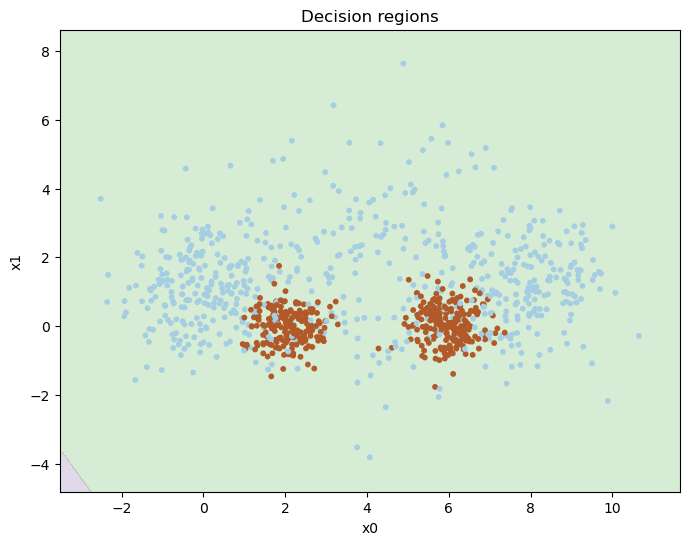

In [16]:
cl_tuning = NumpyLinRegClass() #Classifier for tuning
best_tuning = find_optimal_hyperparameters(cl_tuning, X_train, t2_train) #Use function to find best parameters
print(f"The best learning rate: {best_tuning[0]}, number of epochs: {best_tuning[1]}, with accuracy: {best_tuning[2]}")

cl_tuning.fit(X_train, t2_train, lr = best_tuning[0], epochs=best_tuning[1]) #Fit classifier with best parameters
plot_decision_regions(X_train, t2_train, cl_tuning) #Plot decision regions

### Task: Scaling

We have seen in the lectures that scaling the data may improve training speed and sometimes the performance. 

- Implement a scaler, at least the standard scaler (normalizer), but you can also try other techniques
- Scale the data
- Train the model on the scaled data
- Experiment with hyper-parameter settings and see whether you can speed  up  the training.
- Report final hyper-parameter settings and show how you found them.

In [17]:
def normalizer(X):
    """Takes in a dataset X (NxM matrix),N datapoints, M features, it then normalizes the features."""
    mu_i = X.mean(axis=0) #Mean of feature M_i, across all datapoints N [mean(M_1,N), mean(M_2,N),...,mean(M_M,N)]
    std_i = X.std(axis=0) #Same as with mean, but standard deviation of feature M across datapoints N
    
    numerator = X-mu_i
    
    return numerator/std_i

In [18]:
X_train_scaled = normalizer(X_train) #Scale training data

Lr: 0.1, N-epochs: 1, Accuracy: 0.604
Lr: 0.1, N-epochs: 10, Accuracy: 0.606
Lr: 0.1, N-epochs: 11, Accuracy: 0.608
Lr: 0.1, N-epochs: 13, Accuracy: 0.612
Lr: 0.1, N-epochs: 14, Accuracy: 0.614
Lr: 0.1, N-epochs: 15, Accuracy: 0.616
Lr: 0.1, N-epochs: 16, Accuracy: 0.63
Lr: 0.1, N-epochs: 17, Accuracy: 0.638
Lr: 0.1, N-epochs: 18, Accuracy: 0.648
Lr: 0.1, N-epochs: 19, Accuracy: 0.662
Lr: 0.1, N-epochs: 20, Accuracy: 0.672
Lr: 0.1, N-epochs: 21, Accuracy: 0.686
Lr: 0.1, N-epochs: 22, Accuracy: 0.69
Lr: 0.1, N-epochs: 25, Accuracy: 0.692
Lr: 0.1, N-epochs: 27, Accuracy: 0.696
Lr: 0.1, N-epochs: 28, Accuracy: 0.7
Lr: 0.1, N-epochs: 30, Accuracy: 0.71
Lr: 0.1, N-epochs: 31, Accuracy: 0.712
Lr: 0.1, N-epochs: 32, Accuracy: 0.718
Lr: 0.1, N-epochs: 33, Accuracy: 0.722
Lr: 0.1, N-epochs: 54, Accuracy: 0.724
The best learning rate: 0.1, number of epochs: 54, with accuracy: 0.724


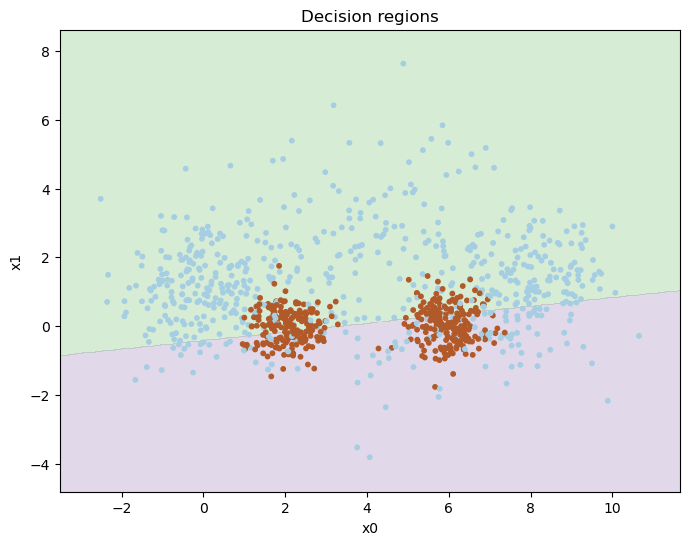

In [19]:
cl_scaled = NumpyLinRegClass() #New classifier

#Find best parameters with scaled training data
best_scaled = find_optimal_hyperparameters(cl_tuning, X_train_scaled, t2_train)
print(f"The best learning rate: {best_scaled[0]}, number of epochs: {best_scaled[1]}, with accuracy: {best_scaled[2]}")

cl_tuning.fit(X_train_scaled, t2_train, lr = best_scaled[0], epochs=best_scaled[1]) #Tune with best parameters

plot_decision_regions(X_train, t2_train, cl_tuning) #Plot decision regions with classifier trained on scaled data.


### Scaling Anwer

- After scaling the training data, the decision regions look way better, and the accuracy has also gotten alot better.
- I used the function that i made to find the best hyperparameters for the previous task, which is again, just bruteforcing different combinations of lr and epochs.
- For this scaled training set, the learning rate was also best at **0.1**, but the accuracy improved with more epochs, until it capped at **54** epochs at a learning rate of **0.1**, with an accyracy of 0.724 or **72.4%**.

## Logistic regression
a) You should now implement a logistic regression classifier similarly to the classifier based on linear regression.
You may use the code from the solution to weekly exercise set week07.

b) In addition to the method `predict()` which predicts a class for the data, include a method `predict_probability()` which predict the probability of the data belonging to the positive class.

c) So far, we have not calculated the loss explicitly in the code. Extend the code to calculate the loss on the training set for each epoch and to store the losses such that the losses can be inspected after training. The prefered loss for logistic regression is binary cross-entropy, but you can also try mean squared error. The most important is that your implementation of the loss corresponds to your implementation of the gradient descent.
Also, calculate and store accuracies after each epoch.

d) In addition, extend the `fit()` method with optional arguments for a validation set (X_val, t_val). If a validation set is included in the call to `fit()`, calculate the loss and the accuracy for the validation set after each epoch. 

e) The training runs for a number of epochs. We cannot know beforehand for how many epochs it is reasonable to run the training. One possibility is to run the training until the learning does not improve much. Extend the `fit()` method with two keyword arguments, `tol` (tolerance) and `n_epochs_no_update` and stop training when the loss has not improved with more than `tol` after `n_epochs_no_update`. A possible default value for `n_epochs_no_update` is 5. Also, add an attribute to the classifier which tells us after fitting how many epochs it was trained for.

f) Train classifiers with various learning rates, and with varying values for `tol` for finding the optimal values. Also consider the effect of scaling the data.

g) After a succesful training, for your best model, plot both training loss and validation loss as functions of the number of epochs in one figure, and both training and validation accuracies as functions of the number of epochs in another figure. Comment on what you see. Are the curves monotone? Is this as expected?

In [20]:
def logistic(X):
    """Function to apply sigmoid function to X"""
    return 1/(1+np.exp(-X))
 
class NumpyLogReg(NumpyClassifier):
    """Logistic regression classifier"""
    
    def __init__(self, bias=-1):
        self.bias=bias
    
    def forward(self, X):
        return logistic(X @ self.weights)
        
    def fit(self, X_train, t_train, lr = 0.1, epochs=10, X_val = None, t_val = None, tol = 0.03, n_epochs_no_update = 5):
        """X_train is a NxM matrix, N data points, m features
        t_train is avector of length N,
        the targets values for the training data"""
    
        X_train_unbiased = X_train #Used in accuracy calculation, because self.predict would add additional bias 
        if self.bias:
                X_train = add_bias(X_train, self.bias)
                
        (N, M) = X_train.shape
        self.weights = weights = np.zeros(M)
        self.epoch_stopped = epochs
        
        self.accuracies = [] #Stores training accuracies
        self.loss_history = [] #Stores training loss
        
        #If validation set is inlcuded, store validation accuracies and loss.
        self.val_given = False
        if X_val is not None:
            self.val_given = True
            self.accuracies_val = [] #Stores validation accuracies
            self.loss_history_val = [] #Stores validation loss
            
            if (self.bias):
                X_val_unbiased = X_val
                X_val = add_bias(X_val, self.bias)
        
            
        
        no_update_count = 0
        for epoch in range(epochs):
            no_update_count += 1
            
            #Calculate and store loss for current weights
            loss = -(1/N) * np.sum(t_train * np.log(self.forward(X_train)) + (1 - t_train) * np.log(1 - self.forward(X_train)))
            self.loss_history.append(loss)
            
            #Calculate and store accuracies for current weights
            self.accuracies.append(accuracy(self.predict(X_train_unbiased), t_train))
            
            
            #If valuation set is given, calculate loss and accuracies for those as well.
            if (self.val_given):
                self.loss_history_val.append(-(1/N) * np.sum(t_val * np.log(self.forward(X_val)) + (1 - t_val) * np.log(1 - self.forward(X_val))))
                self.accuracies_val.append(accuracy(self.predict(X_val_unbiased), t_val))
            
            #Check if the loss has improved more than 'tol', assume 'n_epochs_no_update' > 1 
            if (no_update_count >= n_epochs_no_update):
                if ( abs(self.loss_history[-1] - self.loss_history[-no_update_count]) < tol):
                    self.epoch_stopped = epoch #Epoch were fitting stopped early.
                    return
                else:
                    no_update_count = 0
            weights -= lr / N * X_train.T @ (self.forward(X_train) - t_train) # Update the weight with logistic regression.
        
        
    def predict(self, X, threshold=0.5):
        """X is a KxM matrix for some K>=1
        predict the value for each point in X"""
        
        if self.bias:
            X = add_bias(X, self.bias)
            
        ys = self.forward(X)
        return ys > threshold
    
    def predict_probability(self, X):
        """
        X is a NxM matrix, instead of returning which makes the threshold,
        just return the raw probabilities.
        """
        if self.bias:
            X = add_bias(X, self.bias)
        
        return self.forward(X)

[269, 69, 54, 44, 39, 34, 29, 29, 24, 24]


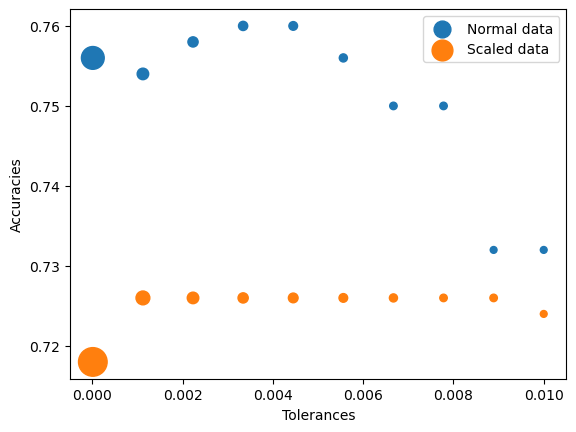

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


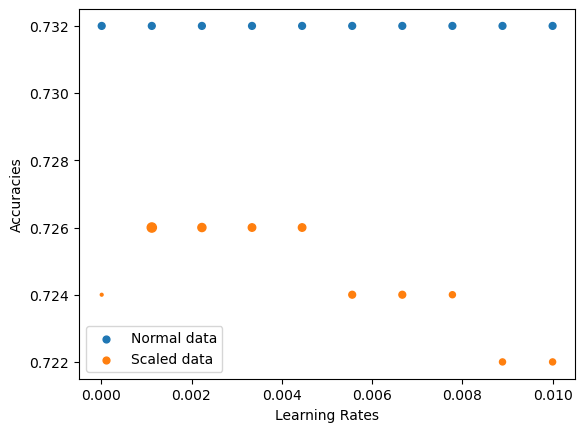

In [21]:
cl_log = NumpyLogReg()

#Lists to store accuracies and tolerances after testing different values of the tolerance, used for plot
tolerances = np.linspace(0.00001, 0.01, 10)
accuracies = []
accuracies_scaled = []
epoch_stopped_scaled = []
epoch_stopped = []

#First find a good tolerance
"""Test different values of tolerance, and plot to see what tolerance is best."""
for t in np.linspace(0.00001, 0.01, 10):
    cl_log.fit(X_train_scaled, t2_train, tol = t, epochs = 1000) #Train on scaled data with variable tolerance
    accuracies_scaled.append(accuracy(cl_log.predict(X_val), t2_val)) #Append accuracy with tolerance 't'
    epoch_stopped_scaled.append(cl_log.epoch_stopped) #Store at which epoch the fitting stopped.
    
    cl_log.fit(X_train, t2_train, tol = t, epochs = 1000) #Train on normal data with variable tolerance
    accuracies.append(accuracy(cl_log.predict(X_val), t2_val))#Append accuracy with tolerance 't'
    epoch_stopped.append(cl_log.epoch_stopped)#Store at which epoch the fitting stopped.
print(epoch_stopped)

plt.scatter(tolerances, accuracies, epoch_stopped,label='Normal data')
plt.scatter(tolerances, accuracies_scaled,epoch_stopped_scaled, label='Scaled data')
plt.xlabel('Tolerances')
plt.ylabel('Accuracies')
plt.legend()
plt.show()


learning_rates = np.linspace(0.00001, 0.01, 10)
accuracies = []
accuracies_scaled = []
epoch_stopped_scaled = []
epoch_stopped = []

"""Test different values of lr, and plot to see what lr is best."""
for l_r in np.linspace(0.00001, 1, 10):
    cl_log.fit(X_train_scaled, t2_train, lr = l_r, tol = 0.00445, epochs = 1000)
    accuracies_scaled.append(accuracy(cl_log.predict(X_val), t2_val))
    epoch_stopped_scaled.append(cl_log.epoch_stopped)
    
    cl_log.fit(X_train, t2_train, tol = t, epochs = 1000)
    accuracies.append(accuracy(cl_log.predict(X_val), t2_val))
    epoch_stopped.append(cl_log.epoch_stopped)
print(epoch_stopped)
    
plt.scatter(learning_rates, accuracies, epoch_stopped, label='Normal data')
plt.scatter(learning_rates, accuracies_scaled, epoch_stopped_scaled, label='Scaled data')
plt.xlabel('Learning Rates')
plt.ylabel('Accuracies')
plt.legend()
plt.show()

## What data to use for Logistic Regression Classifier?

- From the plots, i can see that the non-scaled data works best for the LogReg classifier.
- For the normal data i got the best possible accuracy when i had a learning rate of **0.1** and a tolerance which i will show below:

In [22]:
print(tolerances[3],tolerances[4])

0.0033400000000000005 0.00445


- According to printed epoch_stopped, **0.00445** had the smallest epoch and good accuracy, so i will chose **0.00445** as my tolerance. With a learning rate of **0.1** and number of epochs at **39**

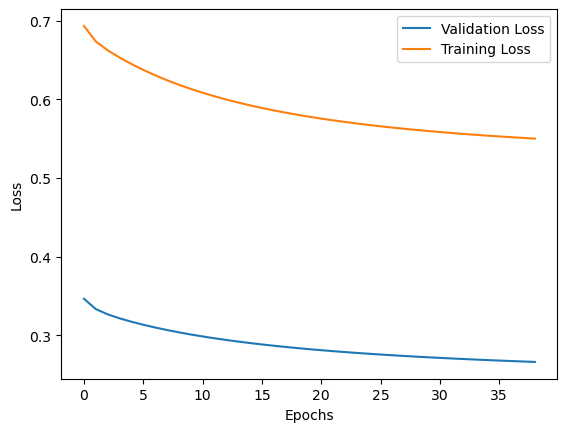

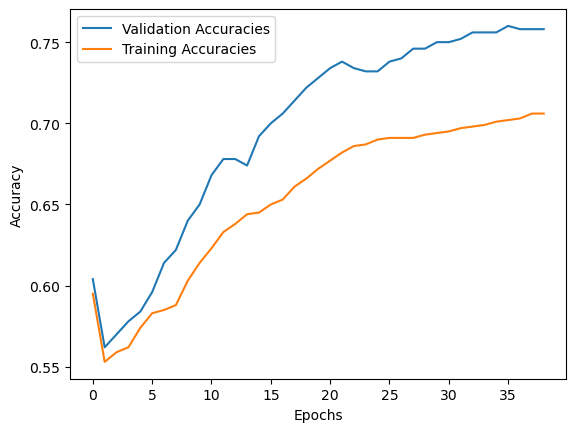

In [23]:
cl_log.fit(X_train, t2_train, lr = 0.1, epochs=39, tol = 0.00445, X_val = X_val, t_val = t2_val) #Tune with best parameters


epoch_range = range(cl_log.epoch_stopped)
plt.plot(epoch_range, cl_log.loss_history_val, label='Validation Loss')
plt.plot(epoch_range, cl_log.loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epoch_range, cl_log.accuracies_val, label='Validation Accuracies')
plt.plot(epoch_range, cl_log.accuracies, label='Training Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 #plot_decision_regions(X_train, t2_train, cl_log) #Plot decision regions with classifier trained on scaled data.

### Are the plots as expected?

- I would say they are, the loss decreases steadily over time, and when the curve flattens, the tolerance kicks in and stops the training. The accuracy sees a big increase at the start, which then also flattens towards the end. I would say the training is good according to these plots.

## Multi-class classifiers
We turn to the task of classifying when there are more than two classes, and the task is to ascribe one class to each input. We will now use the set (X, t_multi).

### "One-vs-rest" with logistic regression
We saw in the lectures how a logistic regression classifier can be turned into a multi-class classifier using the one-vs-rest approach. We train one logistic regression classifier for each class. To predict the class of an item, we run all the binary classifiers and collect the probability score from each of them. We assign the class which ascribes the highest probability.

Build such a classifier. Train the resulting classifier on (X_train, t_multi_train), test it on (X_val, t_multi_val), tune the hyper-parameters and report the accuracy.

Also plot the decision boundaries for your best classifier similarly to the plots for the binary case.

In [24]:
class NumpyMultyClassLogReg(NumpyClassifier):
    def __init__(self, bias =-1):
        self.bias = bias
        self.models = None
    
    def fit(self, X_train, t_train,  lr=0.1, epochs=10, X_val=None, t_val=None, tol=0.3, n_epochs_no_update=5):
        "Trains K differend logistic regression classifiers, for the K-classes of data recieved"
        
        self.classes = np.unique(t_train) #Gives a list of classes (all unique elements of array)
        
        self.models = [] #List to store LogReg classifiers which we train.
        
        for label in self.classes:
            #Gives a list where labels we want to train on is '1' and all else is '0'
            #So we can train on the binary label set.
            t_train_binary = np.where(t_train == label, 1,0) 
            
            model = NumpyLogReg(bias=self.bias) #Create a new LogReg classifier.
            
            #Train the model on binary label set (on specific label in multiclass set).
            model.fit(X_train, t_train_binary, lr=lr, epochs=epochs, tol=tol, n_epochs_no_update=n_epochs_no_update)
            
            self.models.append(model) #Add trained model to the list of models
            
            #Repeat for each label in multiclass set.
    
    def predict(self, X, threshold=0.5):
        """Predicts the class label for each datapoint,"""
        
        #Add the array of probabilities for each model into another array
        all_probabs = np.array([model.predict_probability(X) for model in self.models])
        #Then return the indices of the 
        predicted_classes = np.argmax(all_probabs, axis=0)
        return self.classes[predicted_classes]

*----------TUNING_LEARNING_RATE_1----------*
0.31 1e-05
0.31 0.0001
0.31 0.001
0.32 0.01
0.578 0.1
0.65 1
0.604 1.5
*----------TUNING_LEARNING_RATE_2----------*
0.646 0.995
0.702 0.9961111111111111
0.612 0.9972222222222222
0.644 0.9983333333333333
0.666 0.9994444444444444
0.598 1.0005555555555554
0.646 1.0016666666666665
0.478 1.0027777777777778
0.62 1.0038888888888888
0.578 1.005
*----------TUNING_TOLERANCE----------------*
0.72 1e-05
0.748 0.0001
0.706 0.001
0.468 0.01
0.366 0.1
0.422 1
0.422 1.5
Accuracy after tuning: 0.748


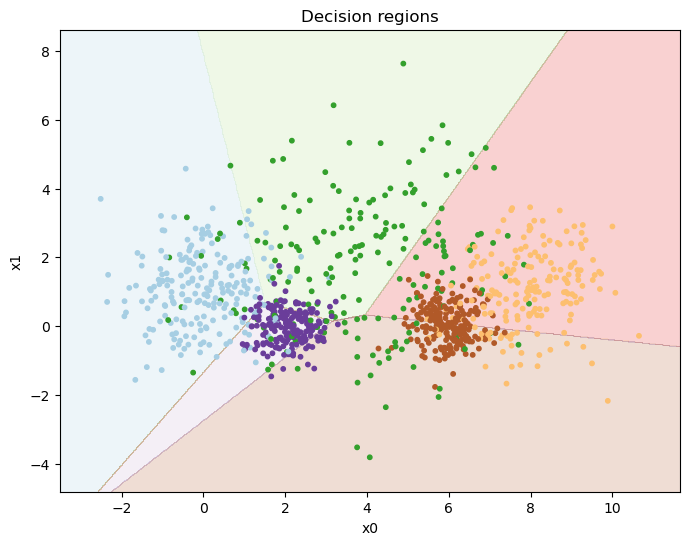

In [25]:
mc_ovr = NumpyMultyClassLogReg() #Create a multiclass classifier.

"""Begin tuning of Hyperparameters
I wont tune epochs, i will just set it to high,
this is because the LogReg-classifiers should stop by themselves
if the tolerance is set right
"""

best_ovr = [0,0,0] # [lr, tol,acc]
#Test different learning rates.
print("*----------TUNING_LEARNING_RATE_1----------*")
for lr in [0.00001,0.0001,0.001,0.01,0.1,1, 1.5]:
    mc_ovr.fit(X_train, t_multi_train, lr = lr, epochs=1000, tol = 0.00445)
    acc = accuracy(mc_ovr.predict(X_val),t_multi_val)
    print(accuracy(mc_ovr.predict(X_val),t_multi_val), lr)
    if acc> best_ovr[2]:
        best_ovr = [lr,0,acc]

print("*----------TUNING_LEARNING_RATE_2----------*")
for lr in np.linspace(best_ovr[0]-.005, best_ovr[0]+.005, 10):
    mc_ovr.fit(X_train, t_multi_train, lr = lr, epochs=1000, tol = 0.00445)
    acc = accuracy(mc_ovr.predict(X_val),t_multi_val)
    print(accuracy(mc_ovr.predict(X_val),t_multi_val), lr)
    if acc> best_ovr[2]:
        best_ovr = [lr,0,acc]


print("*----------TUNING_TOLERANCE----------------*")
#Test different tolerance values
for tol in [0.00001,0.0001,0.001,0.01,0.1,1, 1.5]:
    mc_ovr.fit(X_train, t_multi_train, lr = best_ovr[0], epochs=1000, tol = tol)
    acc = accuracy(mc_ovr.predict(X_val),t_multi_val)
    print(accuracy(mc_ovr.predict(X_val),t_multi_val), tol)
    if acc> best_ovr[2]:
        best_ovr[1],best_ovr[2] = tol, acc
        
print(F"Accuracy after tuning: {best_ovr[2]}")
mc_ovr.fit(X_train, t_multi_train, lr = best_ovr[0], epochs=1000, tol = best_ovr[1]) #Fit with best parameters
plot_decision_regions(X_train, t_multi_train, mc_ovr) #Plot decision regions

# Part 2: Multi-layer neural networks

## A first non-linear classifier

The following code is a simple implementation of a multi-layer perceptron or feed-forward neural network.
For now, it is quite restricted.
There is only one hidden layer.
It can only handle binary classification.
In addition, it uses a simple final layer similar to the linear regression classifier above.
One way to look at it is what happens when we add a hidden layer to the linear regression classifier.

The MLP class below misses the implementation of the `forward()` function. Your first task is to implement it. 

Remember that in the forward pass, we "feed" the input to the model, the model processes it and produces the output. The function should make use of the logistic activation function and bias.

In [26]:
# First, we define the logistic function and its derivative:
def logistic(x):
    return 1/(1+np.exp(-x))

def logistic_diff(y):
    return y * (1 - y)

In [27]:
class MLPBinaryLinRegClass(NumpyClassifier):
    """A multi-layer neural network with one hidden layer"""
    
    def __init__(self, bias=-1, dim_hidden = 6):
        """Intialize the hyperparameters"""
        self.bias = bias
        # Dimensionality of the hidden layer
        self.dim_hidden = dim_hidden
        
        self.activ = logistic
        
        self.activ_diff = logistic_diff
        
    def forward(self, X):

        # Forward propagation - Hidden layer
        hidden_outs = X @ self.weights1  # Matrix multiplication
        hidden_outs = logistic(hidden_outs)  # Apply activation function (logistic)

        # Forward propagation - Output layer
        outputs = hidden_outs @ self.weights2  # Matrix multiplication
        outputs = logistic(outputs)  # Apply activation function (logistic) for binary classification

        
        return hidden_outs, outputs
    
    def fit(self, X_train, t_train, lr=0.001, epochs = 1000, X_val=None, t_val=None, tol=0.03, n_epochs_no_update = 5):
        """Intialize the weights. Train *epochs* many epochs.
        
        X_train is a NxM matrix, N data points, M features
        t_train is a vector of length N of targets values for the training data, 
        where the values are 0 or 1.
        lr is the learning rate
        """
        self.lr = lr
        self.epoch_stopped = epochs
        
        # Turn t_train into a column vector, a N*1 matrix:
        T_train = t_train.reshape(-1,1)
            
        dim_in = X_train.shape[1] 
        dim_out = T_train.shape[1]
        
        # Initialize the weights
        self.weights1 = (np.random.rand(
            dim_in + 1, 
            self.dim_hidden) * 2 - 1)/np.sqrt(dim_in)
        self.weights2 = (np.random.rand(
            self.dim_hidden+1, 
            dim_out) * 2 - 1)/np.sqrt(self.dim_hidden)
        X_train_bias = add_bias(X_train, self.bias)
        self.weights1 = add_bias(self.weights1, self.bias)
        self.weights2 = add_bias(self.weights2, self.bias)
        
        #If validation set is inlcuded, store validation accuracies and loss.
        self.val_given = False
        if X_val is not None:
            self.val_given = True
            self.accuracies_val = [] #Stores validation accuracies
            self.loss_history_val = [] #Stores validation loss
            
            X_val_bias = add_bias(X_val, self.bias)
            T_val = t_val.reshape(-1,1)
        
        self.loss_history = [] # List for storing loss
        self.accuracies = [] # List for storing accuracies
        
        no_update_count = 0
        for epoch in range(epochs):
            # One epoch
            no_update_count += 1
            #Calculate and store loss for current weights
            loss = -(1/dim_out) * np.sum(T_train * np.log(self.forward(X_train_bias)[1]) + (1 - T_train) * np.log(1 - self.forward(X_train_bias)[1]))
            self.loss_history.append(loss)
            
            #Calculate and store accuracies for current weights
            self.accuracies.append(accuracy(self.predict(X_train), t2_train))
            
            #If valuation set is given, calculate loss and accuracies for those as well.
            if (self.val_given):
                self.loss_history_val.append(-(1/dim_out) * np.sum(T_val * np.log(self.forward(X_val_bias)[1]) + (1 - T_val) * np.log(1 - self.forward(X_val_bias)[1])))
                self.accuracies_val.append(accuracy(self.predict(X_val), t_val))
            
            #Check if the loss has improved more than 'tol', assume 'n_epochs_no_update' > 1 
            if (no_update_count >= n_epochs_no_update):
                if ( abs(self.loss_history[-1] - self.loss_history[-no_update_count]) < tol):
                    self.epoch_stopped = epoch #Epoch were fitting stopped early.
                    return
                else:
                    no_update_count = 0
            
            # The forward step:
            hidden_outs, outputs = self.forward(X_train_bias)
            # The delta term on the output node:
            out_deltas = (outputs - T_train)
            # The delta terms at the output of the hidden layer:
            hiddenout_diffs = out_deltas @ self.weights2.T
            # The deltas at the input to the hidden layer:
            hiddenact_deltas = (hiddenout_diffs *
                                self.activ_diff(hidden_outs))  

            # Update the weights:
            self.weights2 -= self.lr * hidden_outs.T @ out_deltas
            self.weights1 -= self.lr * X_train_bias.T @ hiddenact_deltas 
            
    
    def predict(self, X):
        """Predict the class for the members of X"""
        Z = add_bias(X, self.bias)
        forw = self.forward(Z)[1]
        score= forw[:, 0]
        return (score > 0.5)
    
    def predict_probability(self, X):
        Z = add_bias(X, self.bias)
        outputs = self.forward(Z)[1]
        probabilities = self.active(outputs)
        
        return forw[:, 0]

When implemented, this model can be used to make a non-linear classifier for the set `(X, t2)`. Experiment with settings for learning rate and epochs and see how good results you can get. 
Report results for various settings. Be prepared to train for a long time (but you can control it via the number of epochs and hidden size). 

Plot the training set together with the decision regions as in Part I.

*----------TUNING_LEARNING_RATE_1----------*
0.604 1e-05
0.782 0.0001
0.822 0.001
0.816 0.01


C:\Users\vetle\AppData\Local\Temp\ipykernel_8948\409694847.py:73: RuntimeWarning: divide by zero encountered in log
  loss = -(1/dim_out) * np.sum(T_train * np.log(self.forward(X_train_bias)[1]) + (1 - T_train) * np.log(1 - self.forward(X_train_bias)[1]))


0.604 0.1
0.604 1


C:\Users\vetle\AppData\Local\Temp\ipykernel_8948\702837997.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
C:\Users\vetle\AppData\Local\Temp\ipykernel_8948\409694847.py:86: RuntimeWarning: invalid value encountered in scalar subtract
  if ( abs(self.loss_history[-1] - self.loss_history[-no_update_count]) < tol):
C:\Users\vetle\AppData\Local\Temp\ipykernel_8948\409694847.py:73: RuntimeWarning: invalid value encountered in multiply
  loss = -(1/dim_out) * np.sum(T_train * np.log(self.forward(X_train_bias)[1]) + (1 - T_train) * np.log(1 - self.forward(X_train_bias)[1]))


0.604 1.5
0.001
*----------TUNING_EPOCHS----------------*
0.604 5
0.604 10
0.6 25
0.75 50
0.844 100
0.854 200
0.876 400
0.844 500
0.828 1000
Accuracy after tuning: 0.876, [0.001, 400, 0.876]


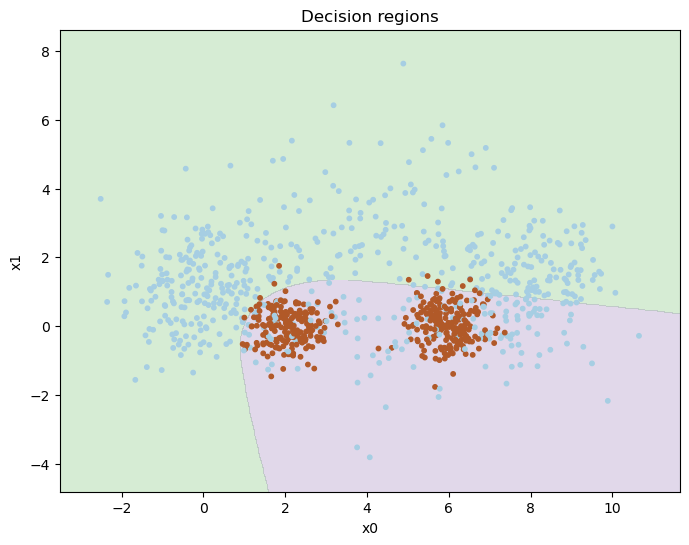

In [28]:
cl_mlp = MLPBinaryLinRegClass() #Create a MLP classifier.

"""Begin tuning of Hyperparameters"""

best_mlp = [0,0,0] # [lr, epoch, acc]
#Test different learning rates.
print("*----------TUNING_LEARNING_RATE_1----------*")
for lr in [0.00001,0.0001,0.001,0.01,0.1,1, 1.5]:
    cl_mlp.fit(X_train, t2_train, lr = lr, epochs=500)
    acc = accuracy(cl_mlp.predict(X_val),t2_val)
    print(accuracy(cl_mlp.predict(X_val),t2_val), lr)
    if acc> best_mlp[2]:
        best_mlp = [lr,500,acc]

print(best_mlp[0])
print("*----------TUNING_EPOCHS----------------*")
#Test different tolerance values
for e in [5,10,25,50,100,200,400,500, 1000]:
    cl_mlp.fit(X_train, t2_train, lr = best_mlp[0], epochs=e)
    acc = accuracy(cl_mlp.predict(X_val),t2_val)
    print(accuracy(cl_mlp.predict(X_val),t2_val), e)
    if acc> best_mlp[2]:
        best_mlp[1],best_mlp[2] = e, acc
        
print(F"Accuracy after tuning: {best_mlp[2]}, {best_mlp}")
cl_mlp.fit(X_train, t2_train, lr = best_mlp[0], epochs=best_mlp[1]) #Fit with best parameters
plot_decision_regions(X_train, t2_train, cl_mlp) #Plot decision regions

# Improving the MLP classifier
You should now make changes to the classifier similarly to what you did with the logistic regression classifier in part 1.

a) In addition to the `predict()` method, which predicts a class for the data, include the `predict_probability()` method which predict the probability of the data belonging to the positive class. The training should be based on these values, as with logistic regression.

b) Calculate the loss and the accuracy after each epoch and store them for inspection after training.

c) Extend the `fit()` method with optional arguments for a validation set `(X_val, t_val)`. If a validation set is included in the call to `fit()`, calculate the loss and the accuracy for the validation set after each epoch.

d) Extend the `fit()` method with two keyword arguments, `tol` (tolerance) and `n_epochs_no_update` and stop training when the loss has not improved for more than `tol` after `n_epochs_no_update`. A possible default value for `n_epochs_no_update` is 5. Add an attribute to the classifier which tells us after fitting how many epochs it was trained on.

e) Tune the hyper-parameters: `lr`, `tol` and `dim-hidden` (size of the hidden layer).
Also, consider the effect of scaling the data.

f) After a succesful training with the best setting for the hyper-parameters, plot both training loss and validation loss as functions of the number of epochs in one figure, and both training and validation accuracies as functions of the number of epochs in another figure. Comment on what you see.

g) The MLP algorithm contains an element of non-determinism. Hence, train the classifier 10 times with the optimal hyper-parameters and report the mean and standard deviation of the accuracies over the 10 runs.

*----------TUNING_LEARNING_RATE------------*
0.888 0.001
0.844 0.01


C:\Users\vetle\AppData\Local\Temp\ipykernel_8948\409694847.py:73: RuntimeWarning: divide by zero encountered in log
  loss = -(1/dim_out) * np.sum(T_train * np.log(self.forward(X_train_bias)[1]) + (1 - T_train) * np.log(1 - self.forward(X_train_bias)[1]))
C:\Users\vetle\AppData\Local\Temp\ipykernel_8948\702837997.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
C:\Users\vetle\AppData\Local\Temp\ipykernel_8948\409694847.py:73: RuntimeWarning: invalid value encountered in multiply
  loss = -(1/dim_out) * np.sum(T_train * np.log(self.forward(X_train_bias)[1]) + (1 - T_train) * np.log(1 - self.forward(X_train_bias)[1]))


0.602 0.1
0.604 1
0.604 1.5
*----------TUNING_TOLERANCE----------------*
0.872 1e-05
0.886 0.0001
0.826 0.001
0.894 0.01
0.832 0.1
0.822 1
0.87 1.5
*----------TUNING_DIM-HIDDEN---------------*
0.604 2
0.852 4
0.844 6
0.84 8
0.824 10
0.886 12
0.84 14
Best accuracy after tuning: 0.894, lr: 0.001, tol: 0.01, dh: 6


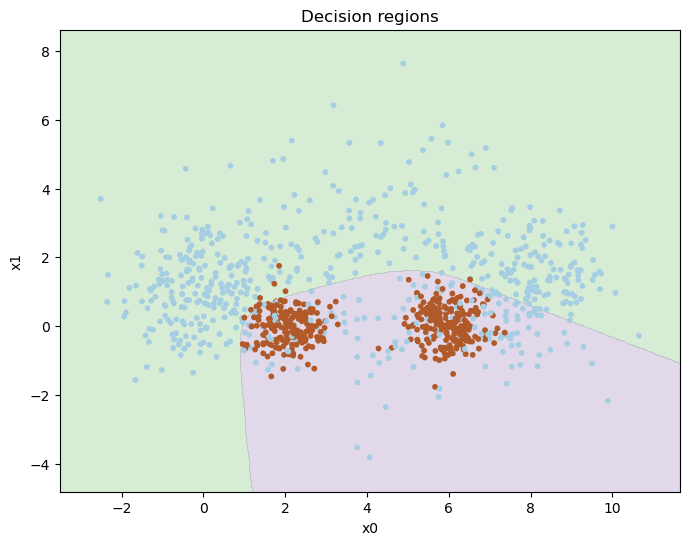

In [29]:
"""Tune the hyper-parameters: lr, tol and dim-hidden (size of the hidden layer). 
Also, consider the effect of scaling the data"""

best_mlp = [0,0,6,0] # [lr, tol, dim-hidden, acc]
#Test different learning rates.
print("*----------TUNING_LEARNING_RATE------------*")
for lr in [0.001,0.01,0.1,1,1.5]:
    cl_mlp.fit(X_train, t2_train, lr = lr)
    acc = accuracy(cl_mlp.predict(X_val),t2_val)
    print(accuracy(cl_mlp.predict(X_val),t2_val), lr)
    if acc> best_mlp[3]:
        best_mlp[0],best_mlp[3] = lr, acc

print("*----------TUNING_TOLERANCE----------------*")
#Test different tolerance values
for t in [0.00001,0.0001,0.001,0.01,0.1,1, 1.5]:
    cl_mlp.fit(X_train, t2_train, lr = best_mlp[0], tol = t)
    acc = accuracy(cl_mlp.predict(X_val),t2_val)
    print(accuracy(cl_mlp.predict(X_val),t2_val), t)
    if acc> best_mlp[3]:
        best_mlp[1],best_mlp[3] = t, acc
        
print("*----------TUNING_DIM-HIDDEN---------------*")
#Test different tolerance values
for dh in [2,4,6,8,10,12,14]:
    cl_mlp = MLPBinaryLinRegClass(dim_hidden = dh) #Create a new classifier with specified dim-hidden
    cl_mlp.fit(X_train, t2_train, lr = best_mlp[0], tol=best_mlp[1]) #Trains it
    acc = accuracy(cl_mlp.predict(X_val),t2_val)
    print(accuracy(cl_mlp.predict(X_val),t2_val), dh)
    if acc > best_mlp[3]:
        best_mlp[2],best_mlp[3] = dh, acc
        
print(F"Best accuracy after tuning: {best_mlp[3]}, lr: {best_mlp[0]}, tol: {best_mlp[1]}, dh: {best_mlp[2]}")
cl_mlp = MLPBinaryLinRegClass(dim_hidden = best_mlp[2])
cl_mlp.fit(X_train, t2_train, lr = best_mlp[0], tol=best_mlp[1]) #Fit with best parameters
plot_decision_regions(X_train, t2_train, cl_mlp) #Plot decision regions

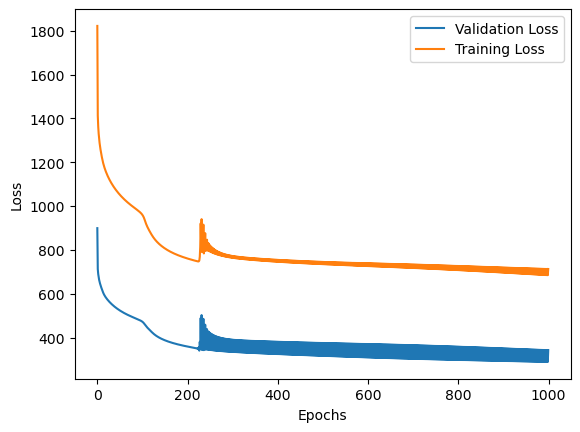

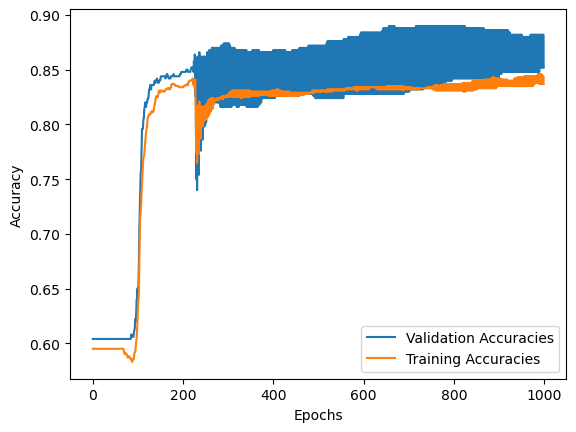

In [31]:
"""
After a succesful training with the best setting for the hyper-parameters, 
plot both training loss and validation loss as functions of the number of epochs in one figure, 
and both training and validation accuracies as functions of the number of epochs in another figure. 
Comment on what you see.
"""
cl_mlp.fit(X_train, t2_train, lr = best_mlp[0], tol=best_mlp[1], X_val = X_val, t_val = t2_val)

epoch_range = range(cl_mlp.epoch_stopped)
plt.plot(epoch_range, cl_mlp.loss_history_val, label='Validation Loss')
plt.plot(epoch_range, cl_mlp.loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epoch_range, cl_mlp.accuracies_val, label='Validation Accuracies')
plt.plot(epoch_range, cl_mlp.accuracies, label='Training Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
"""The MLP algorithm contains an element of non-determinism. 
Hence, train the classifier 10 times with the optimal hyper-parameters and 
report the mean and standard deviation of the accuracies over the 10 runs."""

acc_det = [] #List to store accuracies of training
for i in range(10):
    cl_mlp.fit(X_train, t2_train, lr = best_mlp[0], tol=best_mlp[1]) #Fit classifier with best parameters 10 times
    acc_det.append(accuracy(cl_mlp.predict(X_val),t2_val)) #Store accuracies 

print(f"Mean: {np.mean(acc_det)} Std: {np.std(acc_det)}") #Print out the mean and std of the acc of 10 runs.

Mean: 0.8586 Std: 0.026046880811337107


# Part III: Final testing
We can now perform a final testing on the held-out test set we created in the beginning.

## Binary task (X, t2)
Consider the linear regression classifier, the logistic regression classifier and the multi-layer network with the best settings you found. Train each of them on the training set and evaluate on the held-out test set, but also on the validation set and the training set. Report the performance in a 3 by 3 table.

Comment on what you see. How do the three different algorithms compare? Also, compare the results between the different dataset splits. In cases like these, one might expect slightly inferior results on the held-out test data compared to the validation and training data. Is this the case? 

Also report precision and recall for class 1.

In [33]:
# Create lists to store accuracies for every binary classifier for each dataset
acc_train_f = []
acc_val_f = []
acc_test = []


acc_train_f.append(accuracy(cl_tuning.predict(X_train), t2_train))
acc_train_f.append(accuracy(cl_mlp.predict(X_train),t2_train))
acc_train_f.append(accuracy(cl_log.predict(X_train), t2_train))

acc_val_f.append(accuracy(cl_tuning.predict(X_val), t2_val))
acc_val_f.append(accuracy(cl_mlp.predict(X_val),t2_val))
acc_val_f.append(accuracy(cl_log.predict(X_val), t2_val))

acc_test.append(accuracy(cl_tuning.predict(X_test), t2_test))
acc_test.append(accuracy(cl_mlp.predict(X_test),t2_test))
acc_test.append(accuracy(cl_log.predict(X_test), t2_test))

print("Accuracies for different datasets on form [LinReg_Classifier, MLP_Classifier, LogReg_Classifier] \n")
print(f"Training Set: {acc_train_f}, Validation set: {acc_train_f}, Test Set: {acc_test}")



Accuracies for different datasets on form [LinReg_Classifier, MLP_Classifier, LogReg_Classifier] 

Training Set: [0.697, 0.837, 0.705], Validation set: [0.697, 0.837, 0.705], Test Set: [0.696, 0.834, 0.716]



<center><strong>Accuracies for the classifiers on the data sets</strong></center>


| **Classifier** | **Training Set** | **Validation Set** | **Test Set** |
|---|---|---|---|
| **Linear Regression** | 0.697 | 0.697 | 0.696 |
| **Logistic** | 0.705 | 0.705 | 0.716 |
| **Multi-layer neural networks** | 0.837 | 0.837 | 0.838 |


<center><i>The accuracies are given as a probability of a classifier predicting correct class for a given observation within a dataset</i></center>


For the datasets, we se a steady improvement between each classifier type, with the MLP classifier beeing the best one of the three. The classifiers perform just as good if not even better on the test dataset. For the training and validation set the classifiers seem to be performing at the same level.

Good luck!